# K-Fold Cross Validation

# 1. Definitions
**K-fold** cross validation in machine learning cross-validation is a powerful technique for evaluating predictive models in data science.

It involves splitting the dataset into **k subsets or folds,** where each fold is used as the **validation set** in turn while the remaining **k-1 folds** are used for **training**.

This process is **repeated k times**, and performance metrics such as **accuracy, precision,** and **recall** are computed for each fold.

By averaging these metrics, we obtain an estimate of the model’s generalization performance. This method is essential for model assessment, selection, and **hyperparameter tuning,** offering a reliable measure of a model’s effectiveness.

#### [class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

## 1.1 K-Folds cross-validator
* Provides *train/test indices to split data into **train/test sets**.*
* Split the dataset into **k consecutive folds** (without shuffling by default).
* Each fold is then used once as a **validation set** in turn while the remaining **k - 1** folds are used for **training**
* This process is repeated **k times,** and **performance metrics** such as
    * accuracy,
    * precision, and
    * recall <br>
are computed for each fold.
* By averaging these metrics, we obtain an estimate of the **model’s generalization performance.**

#### def split(X, y=None, groups=None)
* *Generate indices to split data into training and test set.*

##### Parameters
* X : array-like of shape (n_samples, n_features)
      Training data, 'n_samples' is the number of samples
      and 'n_features' is the number of features.
* y : array-like of shape (n_samples,), default=None
      The target variable for supervised learning problems.
* groups : array-like of shape (n_samples,), default=None
      Group labels for the samples used while splitting the dataset into train/test set.

##### Yields
* train : ndarray
      The training set indices for that split.
* test : ndarray
      The testing set indices for that split.

## 1.2  Life Cycle of K-Fold Cross-Validation
*- image designed by* **Shanthababu Pandian**

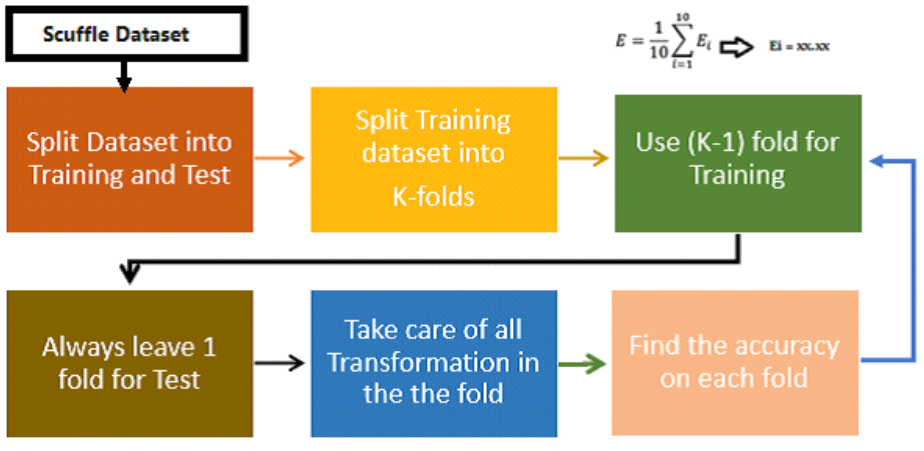

**Thanks to :** [K-Fold Cross Validation Technique](https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/)

## 1.3 Exemplary implementation of K-Fold CV
**train, test array** *and their split by using **K-Fold** as an array in every iteration.*

#### implementation of K-Fold Cross Validation; K = 5
* **shuffle = False**; *dataset will get shuffle in each iteration and **each datapoint** may not get the chance to be consider as a **train and test set** part.*

### 1.3.1 Import libraries

In [1]:
from sklearn.model_selection import KFold
import numpy as np

### 1.3.2 Load dataset

In [2]:
data = np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
print("\n len(np.data)".ljust(60, ' '), " : ", len(data))


 len(np.data)                                                :  20


### 1.3.3 Model implementation and training

In [3]:
kf = KFold(n_splits=5, shuffle=False)

print("\n get_n_splits".ljust(60, ' '), " : ", kf.get_n_splits())
print("\n n_splits".ljust(60, ' '), " : ", kf.n_splits)
print("\n shuffle".ljust(60, ' '), " : ", kf.shuffle)
print("\nTrain and Test dataset split in every iteration or fold.\n")
i = 1
for train, test in kf.split(data):
   print(" Train %d : %s  Test: %s" % (i, data[train], data[test]))
   i += 1

print("\nLength of 'train set' array in each fold".ljust(50, ' '), " : ", len(train))
print("\nLength of 'test set' array in each fold".ljust(50, ' '), " : ", len(test))


 get_n_splits                                                :  5

 n_splits                                                    :  5

 shuffle                                                     :  False

Train and Test dataset split in every iteration or fold.

 Train 1 : [ 25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]  Test: [ 5 10 15 20]
 Train 2 : [  5  10  15  20  45  50  55  60  65  70  75  80  85  90  95 100]  Test: [25 30 35 40]
 Train 3 : [  5  10  15  20  25  30  35  40  65  70  75  80  85  90  95 100]  Test: [45 50 55 60]
 Train 4 : [  5  10  15  20  25  30  35  40  45  50  55  60  85  90  95 100]  Test: [65 70 75 80]
 Train 5 : [ 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80]  Test: [ 85  90  95 100]

Length of 'train set' array in each fold           :  16

Length of 'test set' array in each fold            :  4


# 2. Import libraries

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits

import numpy as np
import matplotlib.pyplot as plt

# 3. Load dataset
## 3.1 Let's do the analysis for hand-written digits dataset

In [5]:
digit_data = load_digits()
print("\n dir(digit_data)".ljust(40, ' '),dir(digit_data))
print("\n len(digit_data['data'])".ljust(40, ' '),len(digit_data['data']))
print("\n len(digit_data['target'])".ljust(40, ' '),len(digit_data['target']))


 dir(digit_data)                        ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

 len(digit_data['data'])                1797

 len(digit_data['target'])              1797


# 4. Split into 'training' and 'test' set

In [6]:
independent, dependent = digit_data['data'], digit_data['target']
print("\n independent".ljust(40, ' '),independent)
print("\n dependent".ljust(40, ' '),dependent)

X_train, X_test, y_train, y_test = train_test_split(digit_data['data'], digit_data['target'], test_size=0.3)
print("\n len(X_train)".ljust(40, ' '),len(X_train))
print("\n len(X_test)".ljust(40, ' '),len(X_test))
print("\n len(y_train)".ljust(40, ' '),len(y_train))
print("\n len(y_test)".ljust(40, ' '),len(y_test))


 independent                            [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

 dependent                              [0 1 2 ... 8 9 8]

 len(X_train)                           1257

 len(X_test)                            540

 len(y_train)                           1257

 len(y_test)                            540


# 5. Model implmentation and training
## 5.1 Logistic Regression
Use ***liblinear***. This is the **“Large Linear Classification”** category.

It uses a **Co-ordinate-Descent Algorithm.** This would minimize a **multivariate** function by resolving the **univariate** and its optimization problems during the loop.

In [7]:
lr = LogisticRegression(solver="liblinear", multi_class='ovr')

# training the data set
lr.fit(X_train, y_train)

# check the score from the model
lr.score(X_test, y_test)

0.9629629629629629

## 5.2 SVC
Author want to just use **"gamma"** as a parameter for non-linear perspective for hyperplanes. The value of the gamma tries to fit the training data set and uses **"1/n_features"**.

In [8]:
svm = SVC(gamma='auto')

# training the data set
svm.fit(X_train, y_train)

# check the score from the model
svm.score(X_test, y_test)

0.48703703703703705

## 5.3 Random Forest Classification
For RFC, let's use 40 trees as an estimators as 40.

In [9]:
rfc = RandomForestClassifier(n_estimators=40)

# training the data set
rfc.fit(X_train, y_train)

# check the score from the model
rfc.score(X_test, y_test)

0.9648148148148148

# 6. Model Validation

Scores from the above list of algorithms
1. Logistic Regression,
2. Random Forest,
3. Support Vector Machine

compare to each other for better selection.




#### Now, let use here **"cross_val_score"** function to get the scores, by passing different algorithms with digit dataset and
#### **cv**: cross-validation generator or an iterable, default=None

Which determines the cross-validation splitting strategy

### 6.1 Cross Validation score by Logistic Regression algorithm

In [10]:
# score_lr = cross_val_score(LogisticRegression(solver="liblinear", multi_class='ovr'), digit_data['data'], digit_data['target'], cv=3)
# independent, dependent = digit_data['data'], digit_data['target']

score_lr = cross_val_score(lr, digit_data['data'], digit_data['target'], cv=5)
print("\n Logistic Regression")
print("\n score_lr".ljust(40, ' '), score_lr)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 Logistic Regression

 score_lr                               [0.92222222 0.88333333 0.95264624 0.95821727 0.89415042]

 Average score_lr                       0.9221138966264315


### 6.2 Cross Validation score by Support Vector Machine algorithm

In [11]:
score_svm = cross_val_score(svm, digit_data['data'], digit_data['target'], cv=5)
print("\n Support Vector Machine")
print("\n score_svm".ljust(40, ' '), score_svm)
print("\n Average score_svm".ljust(40, ' '), np.average(score_svm))


 Support Vector Machine

 score_svm                              [0.41111111 0.45       0.454039   0.44846797 0.47910864]

 Average score_svm                      0.448545341999381


### 6.3 Cross Validation score by Random Forest Classifier algorithm

In [12]:
score_rf = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=5)
print("\n Random Forest Classifier")
print("\n score_rf".ljust(40, ' '), score_rf)
print("\n Average score_rf".ljust(40, ' '), np.average(score_rf))


 Random Forest Classifier

 score_rf                               [0.93055556 0.88611111 0.95821727 0.96657382 0.93036212]

 Average score_rf                       0.934363974001857


Based on the above observation, author wants to stick with Random Forest Classifier for this dataset for production.

# 7. Parameter Tuning Using K-Fold
#### Now, let's consider the **RandomForestClassifier** for this analysis, and keeping changing **"n_estimators"** parameter for this case while keeping the **"CV"** constant as **10** (*commonly used*)

### 7.1 Random Forest Classifier with 20 tress

In [13]:
rfc = RandomForestClassifier(n_estimators=20)
score_rf_20 = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=10)
print("\n Random Forest Classifier with 20 tress")
print("\n score_rf_20".ljust(40, ' '), score_rf_20)
print("\n Average score_rf_20".ljust(40, ' '), np.average(score_rf_20))


 Random Forest Classifier with 20 tress

 score_rf_20                            [0.90555556 0.95555556 0.93888889 0.94444444 0.94444444 0.93333333
 0.96666667 0.98324022 0.90502793 0.91061453]

 Average score_rf_20                    0.9387771570453133


### 7.2 Random Forest Classifier with 30 tress

In [14]:
rfc = RandomForestClassifier(n_estimators=30)
score_rf_30 = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=10)
print("\n Random Forest Classifier with 30 tress")
print("\n score_rf_30".ljust(40, ' '), score_lr)
print("\n Average score_rf_30".ljust(40, ' '), np.average(score_rf_30))


 Random Forest Classifier with 30 tress

 score_rf_30                            [0.92222222 0.88333333 0.95264624 0.95821727 0.89415042]

 Average score_rf_30                    0.939338919925512


### 7.3 Random Forest Classifier with 40 tress

In [15]:
rfc = RandomForestClassifier(n_estimators=40)
score_rf_40 = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=10)
print("\n Random Forest Classifier with 40 tress")
print("\n score_rf_40".ljust(40, ' '), score_rf_40)
print("\n Average score_rf_40".ljust(40, ' '), np.average(score_rf_40))


 Random Forest Classifier with 40 tress

 score_rf_40                            [0.92777778 0.97777778 0.93888889 0.94444444 0.96666667 0.97222222
 0.96666667 0.97765363 0.91620112 0.93296089]

 Average score_rf_40                    0.9521260086902543


# 8. Data Visualization

## 8.1 K-Fold for Visual form
Visual representation is always the best evidence for any data which is located across the axes.

#### class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]

### n_neighborsint, (default=5) Number of neighbors


In [16]:
knn = KNeighborsClassifier()
# independent, dependent = digit_data['data'], digit_data['target']
score_knn = cross_val_score(knn, digit_data['data'], digit_data['target'], cv=10)
print("\n KNeighborsClassifier")
print("\n score_knn".ljust(40, ' '), score_knn)
print("\n Average score_knn".ljust(40, ' '), np.average(score_knn))


 KNeighborsClassifier

 score_knn                              [0.92777778 0.98333333 0.97777778 0.95555556 0.97222222 0.97222222
 0.99444444 0.98324022 0.98324022 0.96648045]

 Average score_knn                      0.9716294227188081


In [17]:
knn_range = list(range(1, 12))
knn_score = []

for k in knn_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  # independent, dependent = digit_data['data'], digit_data['target']
  k_score = cross_val_score(knn, digit_data['data'], digit_data['target'], cv=10, scoring='accuracy')
  knn_score.append(k_score.mean())

print("\nKNeighborsClassifier with different neighbors\n")
print("Knn range\tKnn score")
print("="*40)

# print("\n Knn score")
# print("%.3f" % knn_score)

# appending a list 'round_off' with 3 decimal digits of knn's score
round_off = ['%.3f' % score for score in  knn_score]
# print("{:.2f}".format(round(knn_score, 2)))

# print(len(round_off))
for k in range(1, len(round_off)):
  # print("".ljust(4, ''), round_off[k], end='')
  print(k,"\t\t",round_off[k])

# for k in knn_range:
#   # print("".ljust(6, ' '), k, end='')
#   print(k,"\t",round_off[k])
# print(round_off)


KNeighborsClassifier with different neighbors

Knn range	Knn score
1 		 0.974
2 		 0.977
3 		 0.972
4 		 0.972
5 		 0.968
6 		 0.968
7 		 0.965
8 		 0.965
9 		 0.962
10 		 0.964


## 8.2 Visualization by using Matplotlib

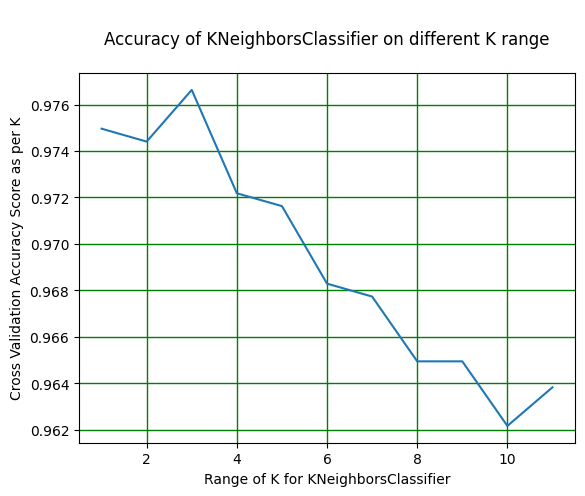

In [18]:
%matplotlib inline
# independent (X), dependent (y)
plt.plot(knn_range, knn_score)
plt.title("\nAccuracy of KNeighborsClassifier on different K range\n")
plt.xlabel("Range of K for KNeighborsClassifier")
plt.ylabel("Cross Validation Accuracy Score as per K")
# plt.grid(color='r', linestyle='-', linewidth=1, animated=False)
plt.grid(c='g', ls='-', lw=1, fillstyle='full')